# Clustering Jerarquico

In [196]:
import numpy as np  # Uitl para realizar calculos avanzados
import pandas as pd  # Contienen funciones que nos ayudan en el calculo de datos
import matplotlib.pyplot as plt  # Para crear graficos de muy buena calidad
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline

**Importando los datos**

In [197]:
# Importamos nuestra base de datos telecomunicaciones y luego lo asignamos a "data" y con drop obviamos lo que no queremos
tele = (pd.read_csv("C:/Users/fguti/Downloads/Telecomunicaciones.csv")).drop(["region", "permanencia", "edad", "estado_civil", "dirección", "ingresos_familiares", "nivel_educativo", "empleo", "jubilado", "genero",
                                                                              "n_pers_hogar", "larga_distancia_mes", "llamadas_gratuitas_mes", "equipo_mes", "Tarjeta_mes", "inhalámbrico_mes", "larga_distancia_per",
                                                                              "llamadas_gratuitas_per", "equipos_per", "tarjeta_per", "inhalámbrico_per", "categoria_cliente", "rotación_mes"], axis=1)


In [198]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   llamada_gratuitas        1000 non-null   int64
 1   alquiler_equipo          1000 non-null   int64
 2   tarjeta_llamada          1000 non-null   int64
 3   Inhalámbrico             1000 non-null   int64
 4   lineas_múltiples         1000 non-null   int64
 5   mensaje_voz              1000 non-null   int64
 6   servicio_busca           1000 non-null   int64
 7   internet                 1000 non-null   int64
 8   identificador_llamada    1000 non-null   int64
 9   llamada_espera           1000 non-null   int64
 10  desvio_llamadas          1000 non-null   int64
 11  llamada_a_tres           1000 non-null   int64
 12  facturación_electrónica  1000 non-null   int64
dtypes: int64(13)
memory usage: 101.7 KB


In [199]:
tele.head()

,llamada_gratuitas,alquiler_equipo,tarjeta_llamada,Inhalámbrico,lineas_múltiples,mensaje_voz,servicio_busca,internet,identificador_llamada,llamada_espera,desvio_llamadas,llamada_a_tres,facturación_electrónica
0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,1,1,0,1,1,0,1,1,1,1,0
2,1,0,1,0,0,0,0,0,1,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,1,1,0


**Para llevar acabo el analisis, obtenemos los valores de los servicios para llevar a cabo el analisis de datos**

In [200]:
servicios = tele.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]].values
servicios
#Transponiendo matriz
#transp = servicios.transpose()
#transp


array([[0, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 0, 0, 1]], dtype=int64)

**Crearemos el Dendograma del Clustering en Jerarquico**

In [201]:
clustering_jerarquico = linkage(servicios, 'ward') #Utilizamos el mettodo Ward para agrupar los cluster

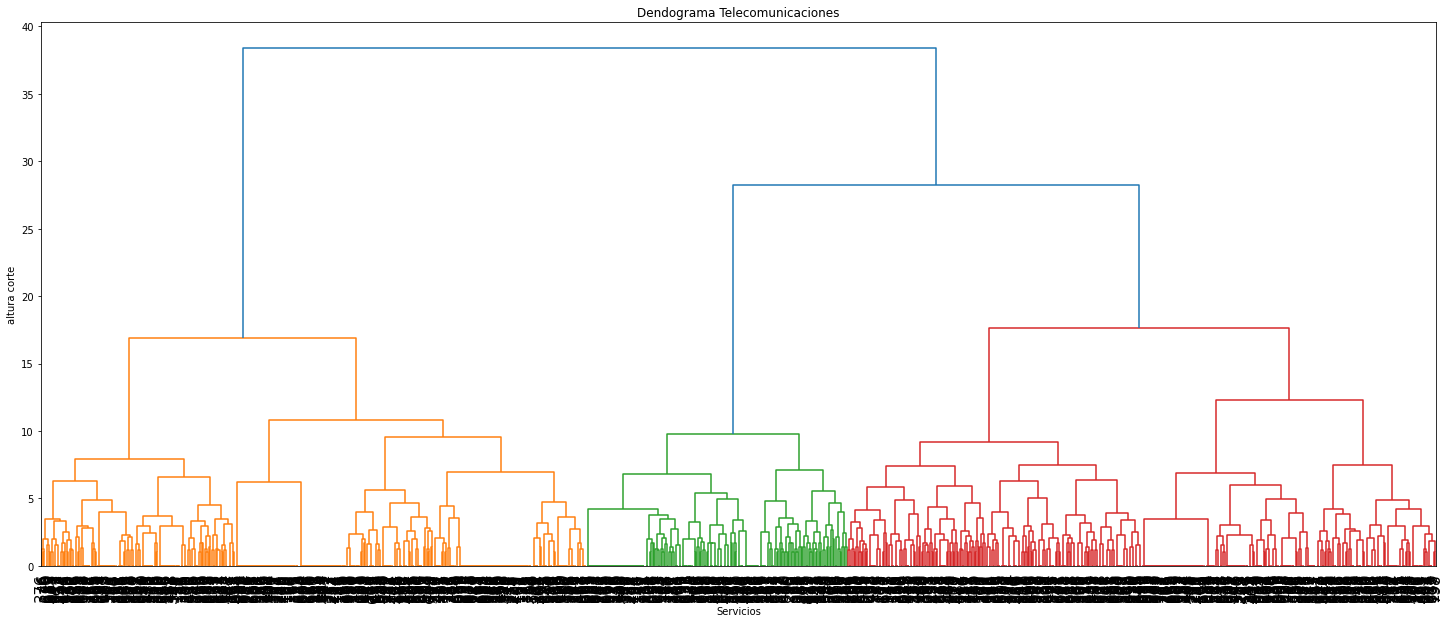

In [202]:
plt.figure(figsize=(25, 10))  # Dimensión para el grafico
plt.title("Dendograma Telecomunicaciones")  # Titulo
plt.xlabel("Servicios")  # Etique eje X
plt.ylabel("altura corte")  # Etiqueta eje Y
dendrogram = sch.dendrogram(clustering_jerarquico, leaf_font_size=15)

**Asignamos los cluster a cada usuario**

In [203]:
clusters = fcluster(clustering_jerarquico, t=15, criterion='distance') #t: es la altura a la que haremos el corte del dendograma

In [204]:
clusters

array([4, 5, 4, 2, 4, 4, 1, 3, 5, 2, 1, 5, 2, 3, 2, 1, 4, 4, 2, 3, 3, 4,
       3, 2, 5, 5, 3, 4, 2, 1, 1, 3, 5, 2, 3, 1, 3, 5, 5, 5, 5, 5, 2, 3,
       4, 1, 1, 3, 2, 4, 2, 2, 3, 4, 2, 3, 2, 2, 5, 1, 5, 5, 2, 1, 3, 2,
       4, 5, 2, 3, 2, 1, 2, 1, 5, 1, 4, 2, 5, 3, 3, 2, 5, 5, 1, 2, 2, 3,
       3, 4, 1, 4, 3, 3, 2, 3, 4, 4, 5, 4, 4, 4, 5, 1, 4, 4, 2, 5, 2, 2,
       1, 2, 2, 1, 5, 2, 4, 4, 4, 4, 2, 2, 4, 1, 2, 2, 3, 1, 2, 5, 4, 2,
       5, 1, 5, 2, 2, 5, 4, 3, 3, 4, 3, 2, 5, 3, 3, 4, 4, 2, 2, 4, 3, 3,
       5, 4, 1, 2, 1, 4, 5, 5, 2, 4, 1, 1, 3, 2, 2, 1, 3, 4, 3, 1, 2, 3,
       4, 3, 3, 2, 3, 4, 2, 1, 2, 2, 2, 1, 5, 4, 2, 3, 1, 4, 3, 2, 2, 5,
       2, 3, 2, 5, 2, 2, 5, 2, 4, 3, 5, 5, 2, 2, 2, 1, 2, 2, 4, 1, 3, 2,
       4, 3, 2, 5, 2, 5, 3, 4, 3, 5, 5, 5, 2, 2, 3, 4, 5, 4, 4, 5, 2, 5,
       5, 1, 2, 5, 4, 4, 4, 1, 1, 4, 1, 1, 3, 4, 1, 2, 3, 3, 5, 4, 5, 2,
       2, 4, 4, 4, 4, 2, 4, 3, 3, 2, 5, 4, 4, 5, 4, 4, 3, 3, 5, 1, 4, 4,
       5, 4, 5, 4, 3, 4, 1, 5, 5, 3, 4, 2, 3, 2, 4,

**Agregando la clasificación al archivo original**

In [205]:
tele['clustering jerarquico'] = clusters
tele


,llamada_gratuitas,alquiler_equipo,tarjeta_llamada,Inhalámbrico,lineas_múltiples,mensaje_voz,servicio_busca,internet,identificador_llamada,llamada_espera,desvio_llamadas,llamada_a_tres,facturación_electrónica,clustering jerarquico
0,0,0,1,0,0,0,0,0,0,0,1,0,0,4
1,1,0,1,1,0,1,1,0,1,1,1,1,0,5
2,1,0,1,0,0,0,0,0,1,1,0,1,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,1,0,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0,0,0,0,0,0,1,2
996,0,1,0,0,0,0,0,0,0,0,0,0,0,2
997,1,1,1,1,1,1,1,1,1,1,1,1,1,3
998,1,0,1,0,0,1,0,0,1,1,1,1,0,5


**Guardar en el Disco duro  ya con los clusters asigandos**

In [ ]:
tele.to_csv('C:/Users/fguti/Downloads/Telecomunicaciones_clustering.csv')
